## Predict the onset of diabetes based on diagnostic measures. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.


# Columns of the dataset:
### Pregnancies: Number of times pregnant
### Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test
### Blood Pressure:Diastolic blood pressure (mm Hg)
### Skin Thickness:Triceps skin fold thickness (mm)
### Insulin:2-Hour serum insulin (mu U/ml)
### BMI:Body mass index (weight in kg/(height in m)^2)
### Diabetes Pedigree Function:Diabetes pedigree function
### Age:Age (years)
### Outcome:Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Load the data
diabetics = pd.read_csv("C:/Users/test/Desktop/Datasets/diabetes.csv")

In [3]:
#Check the data
diabetics.shape

(768, 9)

In [4]:
#First 5 rows of the data
diabetics.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Last 5 rows of the data
diabetics.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
#Check the data types
diabetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#convert Outcome column to categorical
diabetics['Outcome'] = pd.Categorical(diabetics['Outcome'])

In [8]:
#All Null values
diabetics.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#Statistics of the data
diabetics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
##convert 0 to null in skin thikness,insulin,glucose,blood pressure and BMI
diabetics.loc[diabetics['SkinThickness'] == 0, 'SkinThickness'] = np.nan
diabetics.loc[diabetics['Insulin'] == 0, 'Insulin'] = np.nan
diabetics.loc[diabetics['BMI'] == 0, 'BMI'] = np.nan
diabetics.loc[diabetics['Glucose'] == 0, 'Glucose'] = np.nan
diabetics.loc[diabetics['BloodPressure'] == 0, 'BloodPressure'] = np.nan

In [11]:
#null values
diabetics.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
#Percentage of null values
diabetics.isnull().sum()/diabetics.shape[0] *100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [13]:
import missingno as msno

<AxesSubplot:>

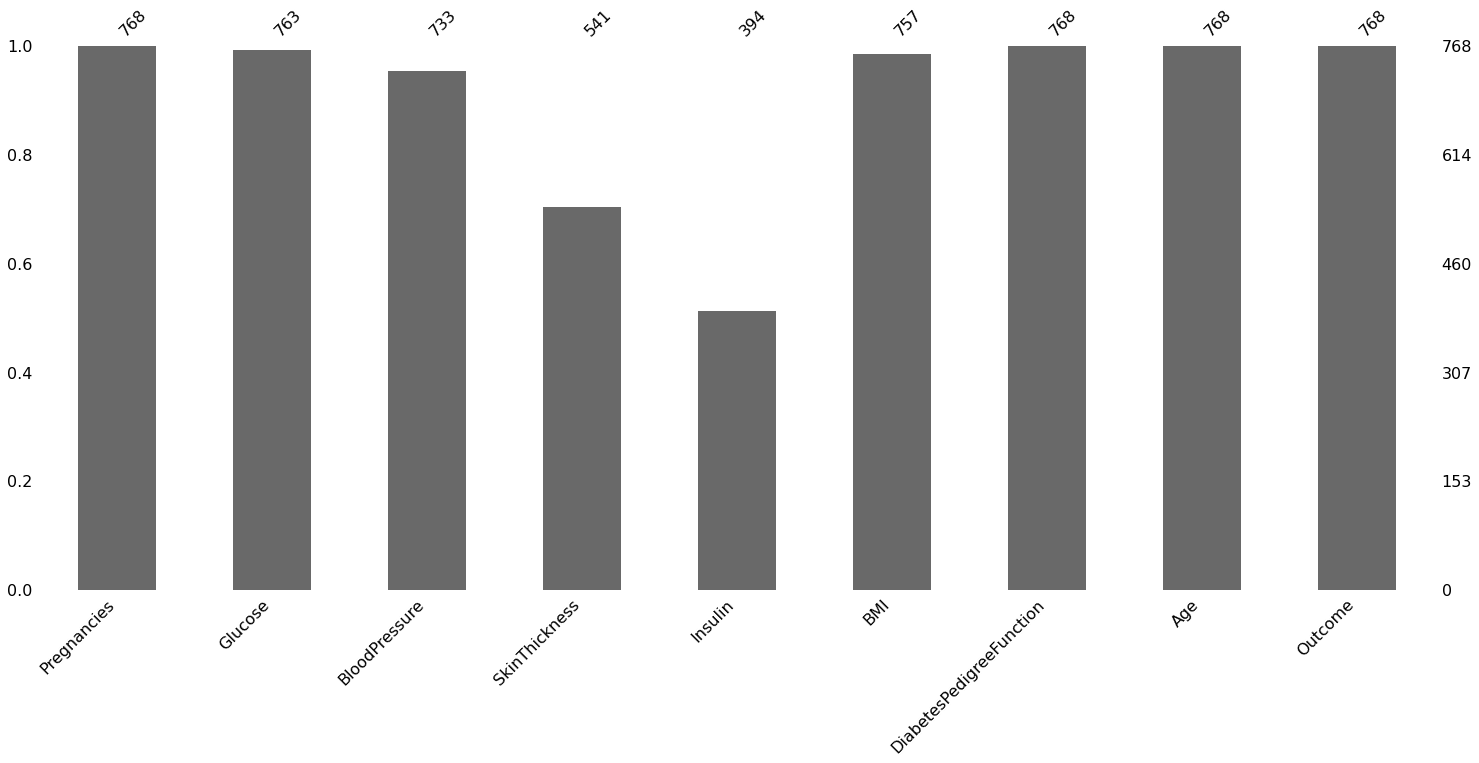

In [14]:
msno.bar(diabetics)

<AxesSubplot:>

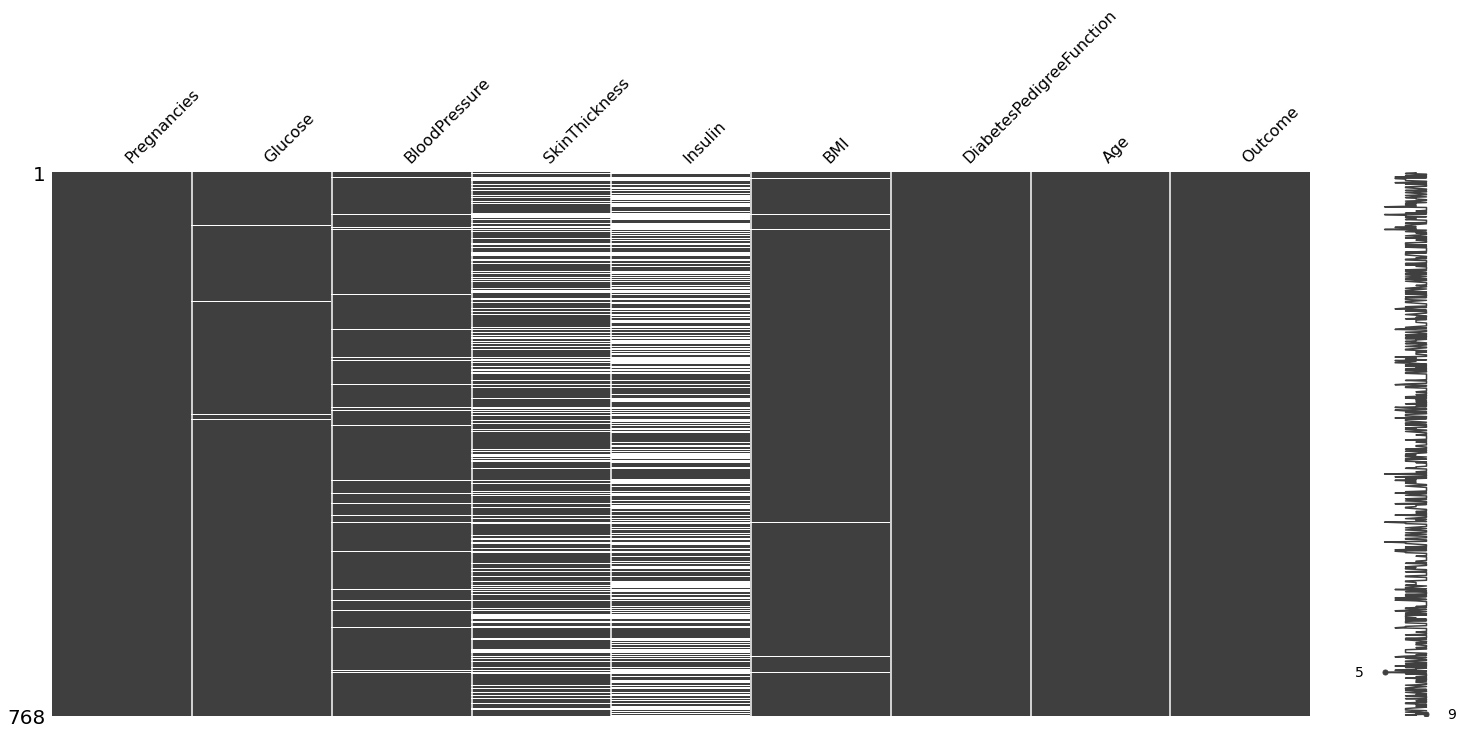

In [15]:
msno.matrix(diabetics)

<AxesSubplot:>

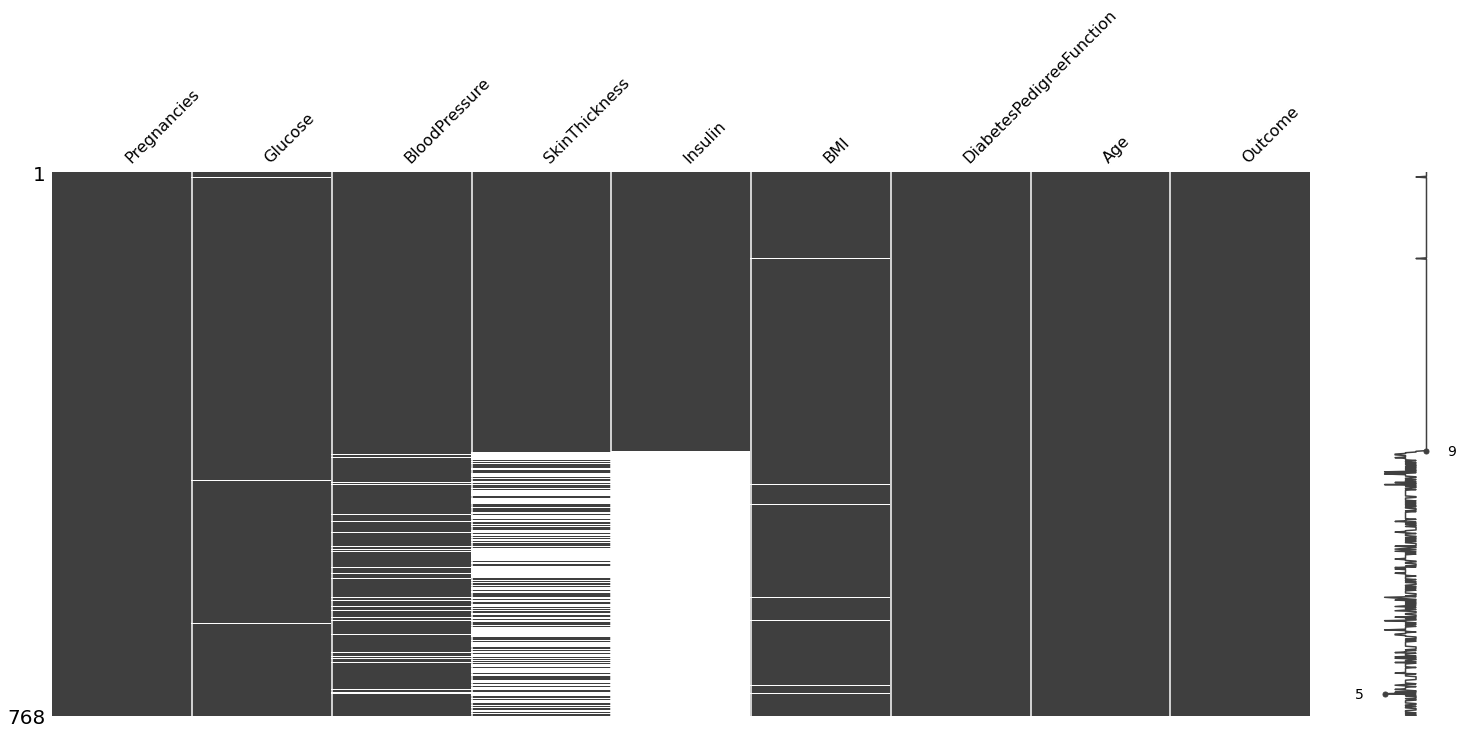

In [16]:
Sort_insulin  = diabetics.sort_values(by = 'Insulin')
msno.matrix(Sort_insulin)

<AxesSubplot:>

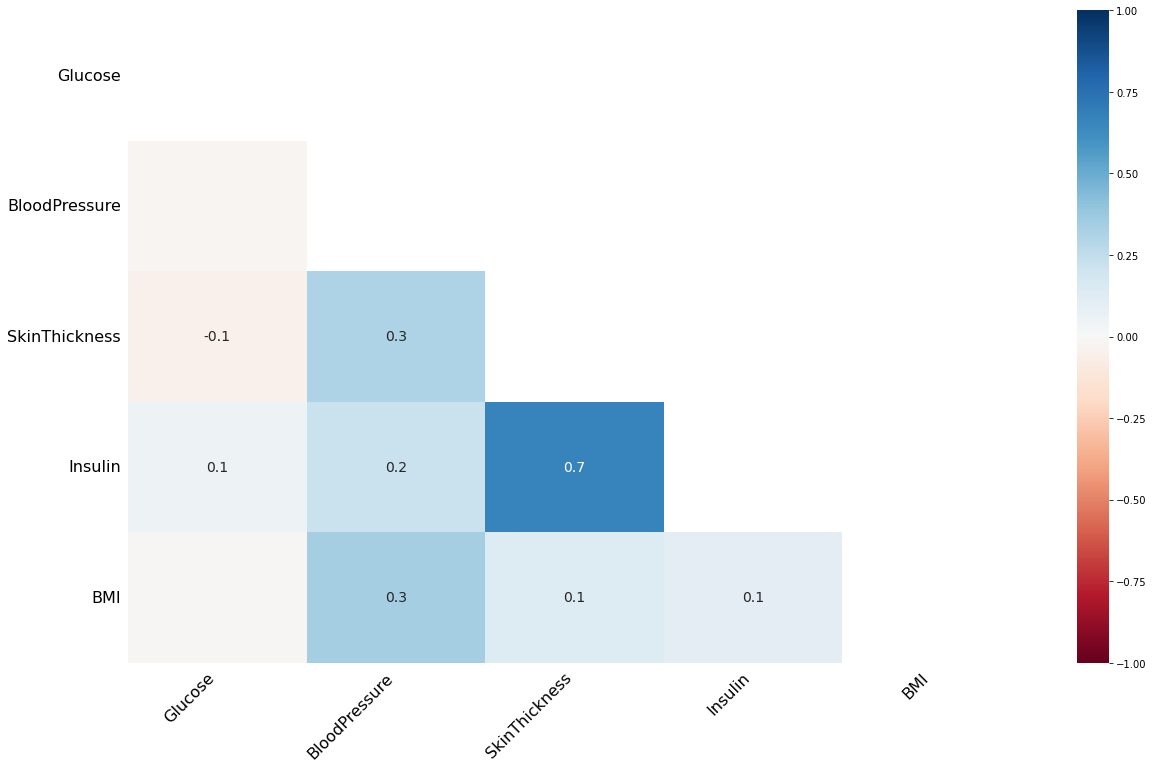

In [17]:
#heatmap for missing values
msno.heatmap(diabetics)

<AxesSubplot:>

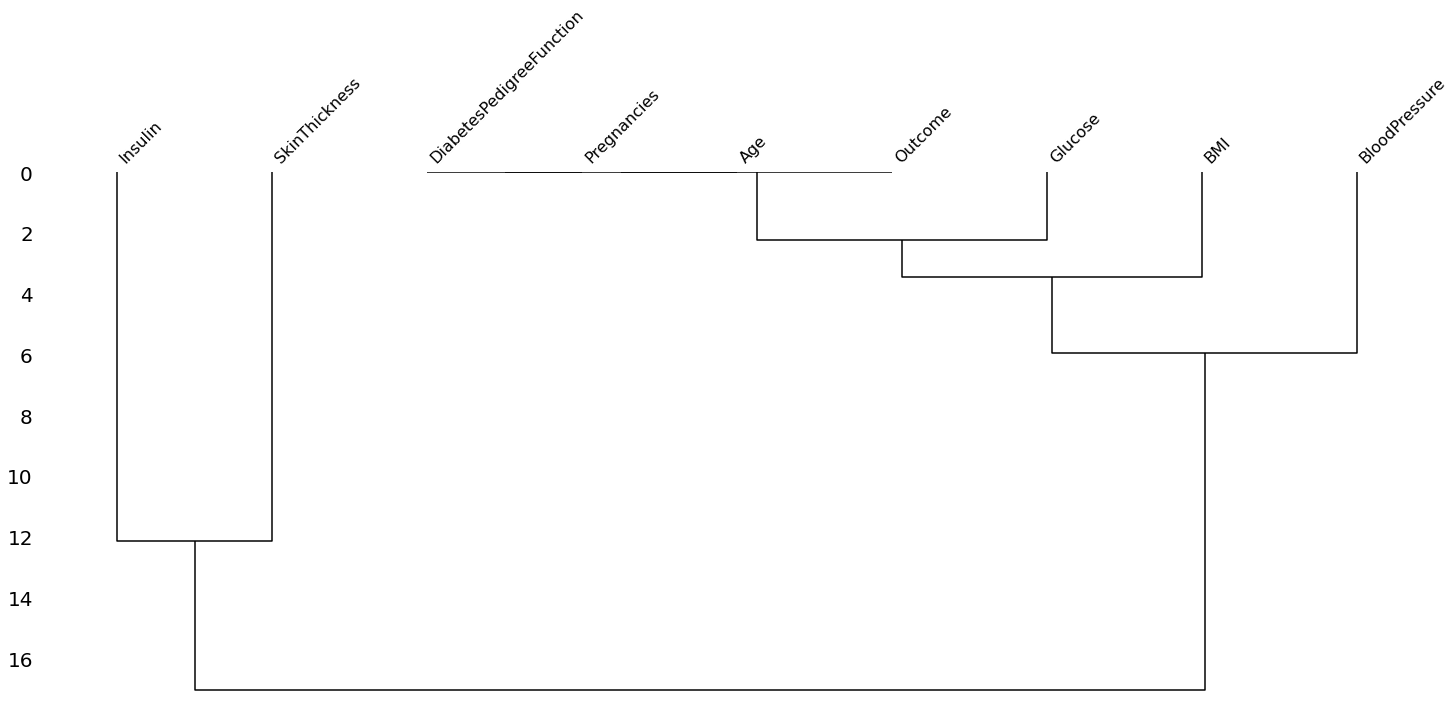

In [18]:
#msno with dendrogram
msno.dendrogram(diabetics)

In [19]:
from fancyimpute import KNN

In [20]:
#Fill insuline, glucose with KNN
diabetics['Insulin'] = KNN(k=3).fit_transform(diabetics['Insulin'].values.reshape(-1,1))
diabetics['Glucose'] = KNN(k=3).fit_transform(diabetics['Glucose'].values.reshape(-1,1))


Imputing row 1/768 with 1 missing, elapsed time: 0.056
Imputing row 101/768 with 1 missing, elapsed time: 0.057
Imputing row 201/768 with 1 missing, elapsed time: 0.059
Imputing row 301/768 with 1 missing, elapsed time: 0.063
Imputing row 401/768 with 1 missing, elapsed time: 0.065
Imputing row 501/768 with 0 missing, elapsed time: 0.067
Imputing row 601/768 with 1 missing, elapsed time: 0.070
Imputing row 701/768 with 0 missing, elapsed time: 0.071
[KNN] Warning: 374/768 still missing after imputation, replacing with 0
Imputing row 1/768 with 0 missing, elapsed time: 0.079
Imputing row 101/768 with 0 missing, elapsed time: 0.082
Imputing row 201/768 with 0 missing, elapsed time: 0.083
Imputing row 301/768 with 0 missing, elapsed time: 0.083
Imputing row 401/768 with 0 missing, elapsed time: 0.083
Imputing row 501/768 with 0 missing, elapsed time: 0.084
Imputing row 601/768 with 0 missing, elapsed time: 0.084
Imputing row 701/768 with 0 missing, elapsed time: 0.084
[KNN] Warning: 5/768

In [21]:
#drop null in BP and BMI
diabetics.dropna(subset=['BloodPressure'],inplace=True)
diabetics.dropna(subset=['BMI'],inplace=True)

In [22]:
#Fill null in SkinThickness with knn
diabetics['SkinThickness'] = KNN(k=3).fit_transform(diabetics['SkinThickness'].values.reshape(-1,1))

Imputing row 1/729 with 0 missing, elapsed time: 0.074
Imputing row 101/729 with 0 missing, elapsed time: 0.075
Imputing row 201/729 with 0 missing, elapsed time: 0.076
Imputing row 301/729 with 0 missing, elapsed time: 0.077
Imputing row 401/729 with 0 missing, elapsed time: 0.077
Imputing row 501/729 with 0 missing, elapsed time: 0.078
Imputing row 601/729 with 1 missing, elapsed time: 0.079
Imputing row 701/729 with 1 missing, elapsed time: 0.080
[KNN] Warning: 192/729 still missing after imputation, replacing with 0


In [23]:
diabetics.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
diabetics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,3.858711,121.046639,72.367627,21.499314,83.946502,32.469959,0.474117,33.318244
std,3.357468,32.255215,12.375838,15.708376,116.803000,6.885098,0.331649,11.753078
min,0.000000,0.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,24.000000,46.000000,32.400000,0.378000,29.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.600000,0.627000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:ylabel='Outcome'>

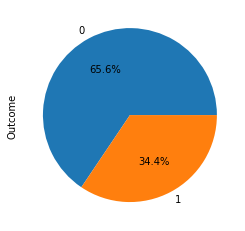

In [25]:
#pie chart for outcome
diabetics['Outcome'].value_counts().plot(kind='pie',autopct='%1.1f%%')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


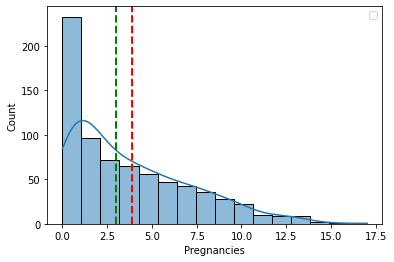

In [26]:
#distriution of Pregnancies
sns.histplot(diabetics['Pregnancies'],kde=True)
plt.axvline(diabetics['Pregnancies'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(diabetics['Pregnancies'].median(),color='g',linestyle='dashed',linewidth=2)
plt.legend()

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


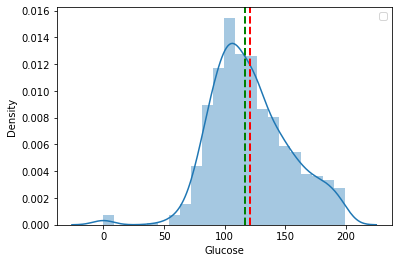

In [27]:
#Distribution of Glucose
sns.distplot(diabetics['Glucose'])
plt.axvline(diabetics['Glucose'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(diabetics['Glucose'].median(),color='g',linestyle='dashed',linewidth=2)
plt.legend()

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


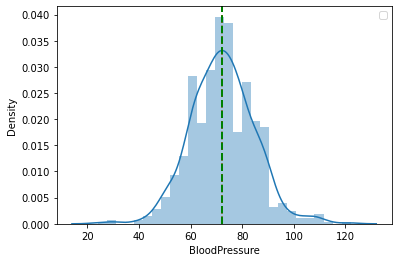

In [28]:
#Distribution of BloodPressure
sns.distplot(diabetics['BloodPressure'])
plt.axvline(diabetics['BloodPressure'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(diabetics['BloodPressure'].median(),color='g',linestyle='dashed',linewidth=2)
plt.legend()

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


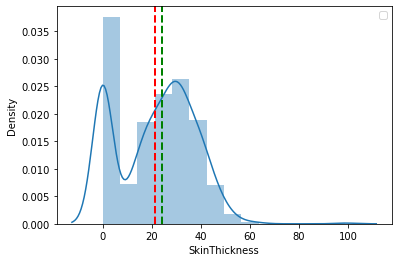

In [29]:
#Distribution of SkinThickness
sns.distplot(diabetics['SkinThickness'])
plt.axvline(diabetics['SkinThickness'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(diabetics['SkinThickness'].median(),color='g',linestyle='dashed',linewidth=2)
plt.legend()

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


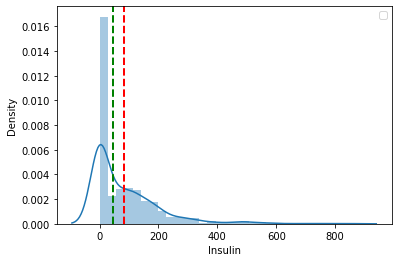

In [30]:
#Distribution of Insulin
sns.distplot(diabetics['Insulin'])
plt.axvline(diabetics['Insulin'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(diabetics['Insulin'].median(),color='g',linestyle='dashed',linewidth=2)
plt.legend()

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


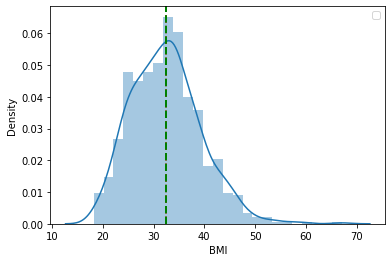

In [31]:
#Distribution of BMI
sns.distplot(diabetics['BMI'])
plt.axvline(diabetics['BMI'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(diabetics['BMI'].median(),color='g',linestyle='dashed',linewidth=2)
plt.legend()

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


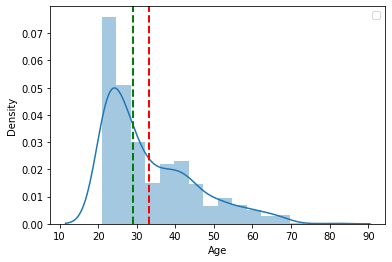

In [32]:
#Distribution of Age
sns.distplot(diabetics['Age'])
plt.axvline(diabetics['Age'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(diabetics['Age'].median(),color='g',linestyle='dashed',linewidth=2)
plt.legend()

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


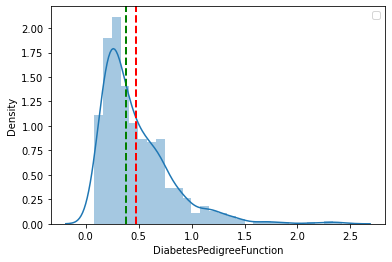

In [33]:
#Distribution of DiabetesPedigreeFunction
sns.distplot(diabetics['DiabetesPedigreeFunction'])
plt.axvline(diabetics['DiabetesPedigreeFunction'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(diabetics['DiabetesPedigreeFunction'].median(),color='g',linestyle='dashed',linewidth=2)
plt.legend()

In [34]:
diabetics.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [35]:
#calculate IQR for data set
Q1 = diabetics['Pregnancies'].quantile(0.25)
Q3 = diabetics['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

In [36]:
#Drop Outliers
diabetics.drop(diabetics[(diabetics['Pregnancies'] < Lower_bound) | (diabetics['Pregnancies'] > Upper_bound)].index,inplace=True)

In [37]:
#Convert to log transform
import scipy.stats as stats
diabetics['Pregnancies'] = np.sqrt(diabetics['Pregnancies'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


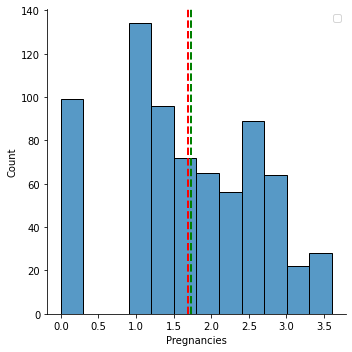

In [38]:
sns.displot(diabetics['Pregnancies'])
plt.axvline(diabetics['Pregnancies'].mean(),color='r',linestyle='dashed',linewidth=2)
plt.axvline(diabetics['Pregnancies'].median(),color='g',linestyle='dashed',linewidth=2)
plt.legend()

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

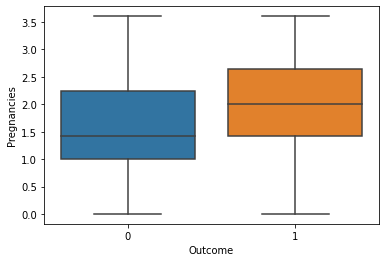

In [39]:
#box plot for Pregnancies and Outcome
sns.boxplot(x='Outcome',y='Pregnancies',data=diabetics)

<AxesSubplot:>

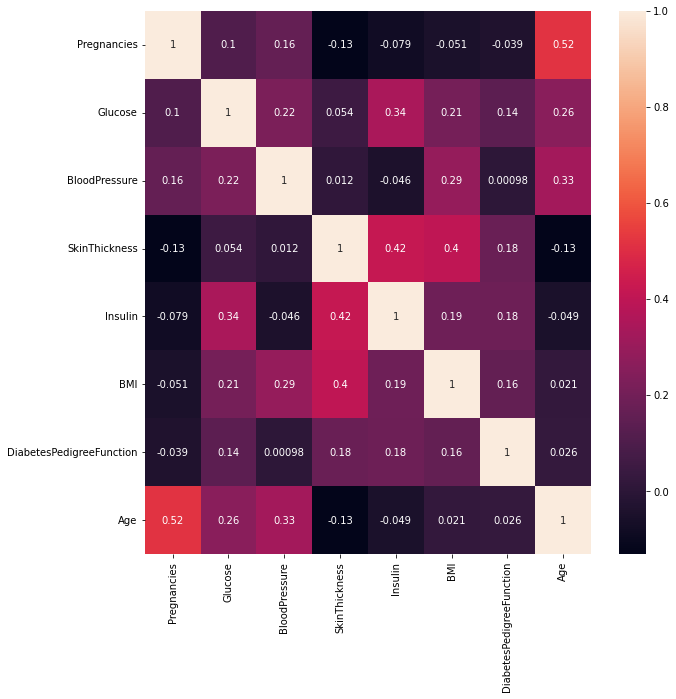

In [40]:
#Heat map for correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(diabetics.corr(),annot=True)

<AxesSubplot:>

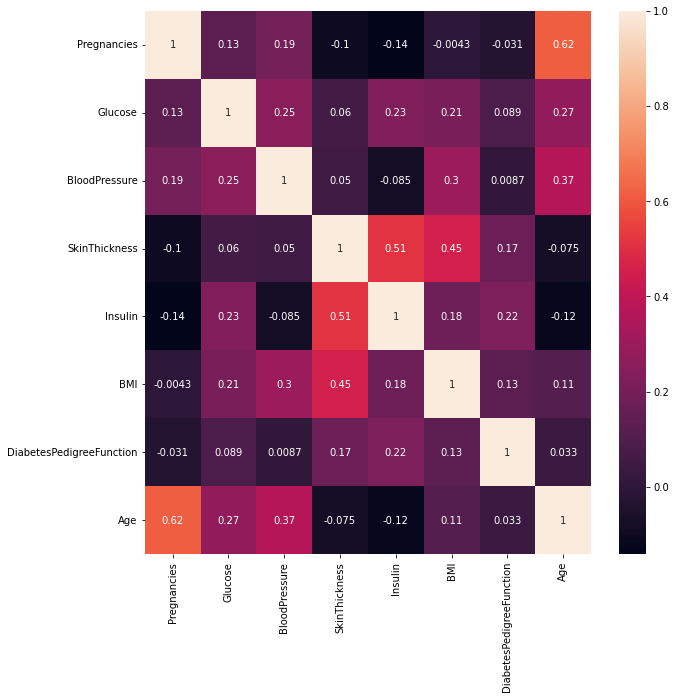

In [41]:
#show spearman correlation
plt.figure(figsize=(10,10))
sns.heatmap(diabetics.corr(method='spearman'),annot=True)

In [42]:
#Binning the BMI
diabetics['BMI_group'] = pd.cut(diabetics['BMI'],bins=[0,19.5,25,30,999],labels=['Underweight','Normal','Overweight','Obese'])

In [43]:
diabetics.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_group
0,2.449490,148.0,72.0,35.0,0.0,33.6,0.627,50,1,Obese
1,1.000000,85.0,66.0,29.0,0.0,26.6,0.351,31,0,Overweight
2,2.828427,183.0,64.0,0.0,0.0,23.3,0.672,32,1,Normal
3,1.000000,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0.000000,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese
